<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLV_using_different_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Understanding**

In [166]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import io
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


%matplotlib inline
import matplotlib
import calendar

In [167]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II (1).xlsx


In [168]:
df = pd.read_excel(io.BytesIO(uploaded.get('online_retail_II.xlsx'))) #reading the excel file#

In [169]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   CustomerID   417534 non-null  float64       
 7   Country      525461 non-null  object        
 8   Brand        525461 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 36.1+ MB


In [171]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
CustomerID     107927
Country             0
Brand               0
dtype: int64

In [172]:
df.describe()

,Quantity,Price,CustomerID,Brand
count,525461.000000,525461.000000,417534.000000,525461.000000
mean,10.337667,4.688834,15360.645478,0.606106
std,107.424110,146.126914,1680.811316,1.303478
min,-9600.000000,-53594.360000,12346.000000,0.000000
25%,1.000000,1.250000,13983.000000,0.000000
50%,3.000000,2.100000,15311.000000,0.000000
75%,10.000000,4.210000,16799.000000,0.000000
max,19152.000000,25111.090000,18287.000000,5.000000


**Exploratory Analysis and Visualization**

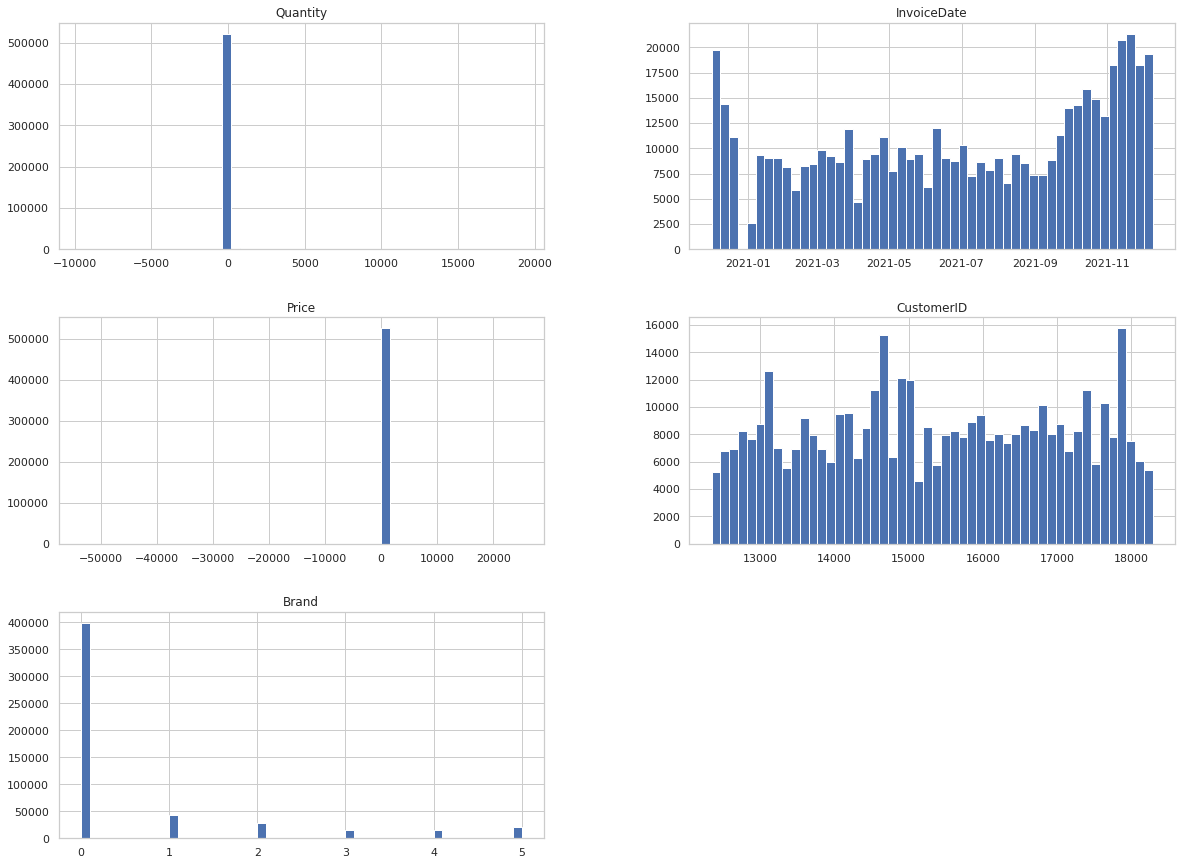

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [174]:
df['Quantity'].describe()

count    525461.000000
mean         10.337667
std         107.424110
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       19152.000000
Name: Quantity, dtype: float64

(array([6.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00, 1.3000e+01,
        8.0000e+00, 1.1000e+01, 1.6000e+01, 4.7000e+01, 1.2219e+04]),
 array([-9.6000e+03, -8.6401e+03, -7.6802e+03, -6.7203e+03, -5.7604e+03,
        -4.8005e+03, -3.8406e+03, -2.8807e+03, -1.9208e+03, -9.6090e+02,
        -1.0000e+00]),
 <a list of 10 Patch objects>)

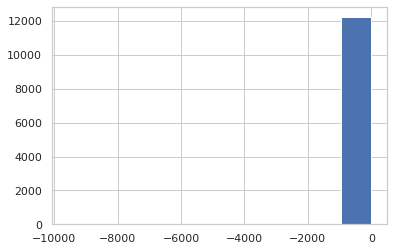

In [175]:
plt.hist(df['Quantity'][df['Quantity']<0])

In [176]:
df['Price'].describe()

count    525461.000000
mean          4.688834
std         146.126914
min      -53594.360000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([-53594.36 , -52127.511, -50660.662, -49193.813, -47726.964,
        -46260.115, -44793.266, -43326.417, -41859.568, -40392.719,
        -38925.87 ]),
 <a list of 10 Patch objects>)

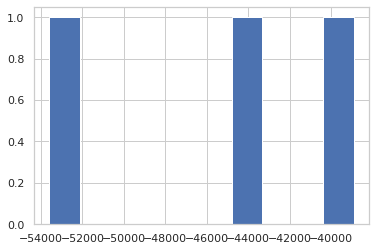

In [177]:
plt.hist(df['Price'][df['Price']<0])

In [178]:
# find out correlation between params
df.corr()

,Quantity,Price,CustomerID,Brand
Quantity,1.000000,-0.001931,-0.011577,0.002252
Price,-0.001931,1.000000,-0.003266,-0.000142
CustomerID,-0.011577,-0.003266,1.000000,-0.004849
Brand,0.002252,-0.000142,-0.004849,1.000000


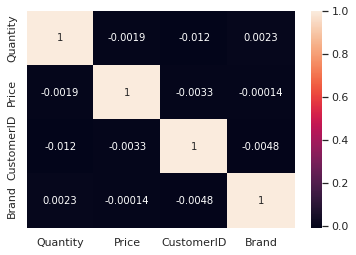

In [179]:
sns.heatmap(df.corr(),annot=True)

In [180]:
df3 = df.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   CustomerID   417534 non-null  float64       
 7   Country      525461 non-null  object        
 8   Brand        525461 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 36.1+ MB


In [181]:
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   CustomerID   417534 non-null  float64       
 7   Country      417534 non-null  object        
 8   Brand        417534 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 31.9+ MB


In [182]:
df3['Quantity'][df3['Quantity']<=0] = None
df3['Quantity'].describe()

count    407695.000000
mean         13.586686
std          96.842229
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

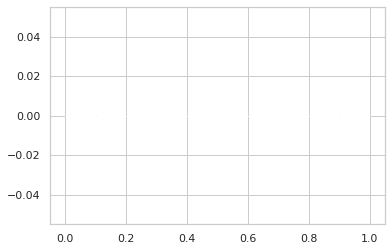

In [183]:
plt.hist(df3['Quantity'][df3['Quantity']<=0])

In [184]:
df3['Price'][df3['Price']<=0] = None
df3['Price'].describe()

count    417503.000000
mean          3.887836
std          71.134430
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       25111.090000
Name: Price, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

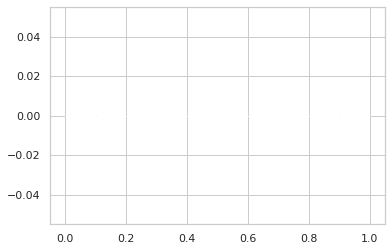

In [185]:
plt.hist(df3['Price'][df3['Price']<=0])

In [186]:
df3= df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  float64       
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   CustomerID   407664 non-null  float64       
 7   Country      407664 non-null  object        
 8   Brand        407664 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


In [187]:
df3.drop(['StockCode','Description'], axis=1, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   Quantity     407664 non-null  float64       
 2   InvoiceDate  407664 non-null  datetime64[ns]
 3   Price        407664 non-null  float64       
 4   CustomerID   407664 non-null  float64       
 5   Country      407664 non-null  object        
 6   Brand        407664 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 24.9+ MB


In [188]:
df3.head()

,Invoice,Quantity,InvoiceDate,Price,CustomerID,Country,Brand
0,489434,12.0,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2
1,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2
3,489434,48.0,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4
4,489434,24.0,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2


In [189]:
df3=df3.rename(columns={'CustomerID': 'ID_OF_CUSTOMER', 'Invoice': 'NUMBER_OF_INVOICE',
                       'InvoiceDate': 'DATE_OF_INVOICE', 'Quantity': 'QUANTITY',
                       'Price': 'PRICE_OF_UNIT'})
df3.head()

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Brand
0,489434,12.0,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2
1,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2
3,489434,48.0,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4
4,489434,24.0,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2


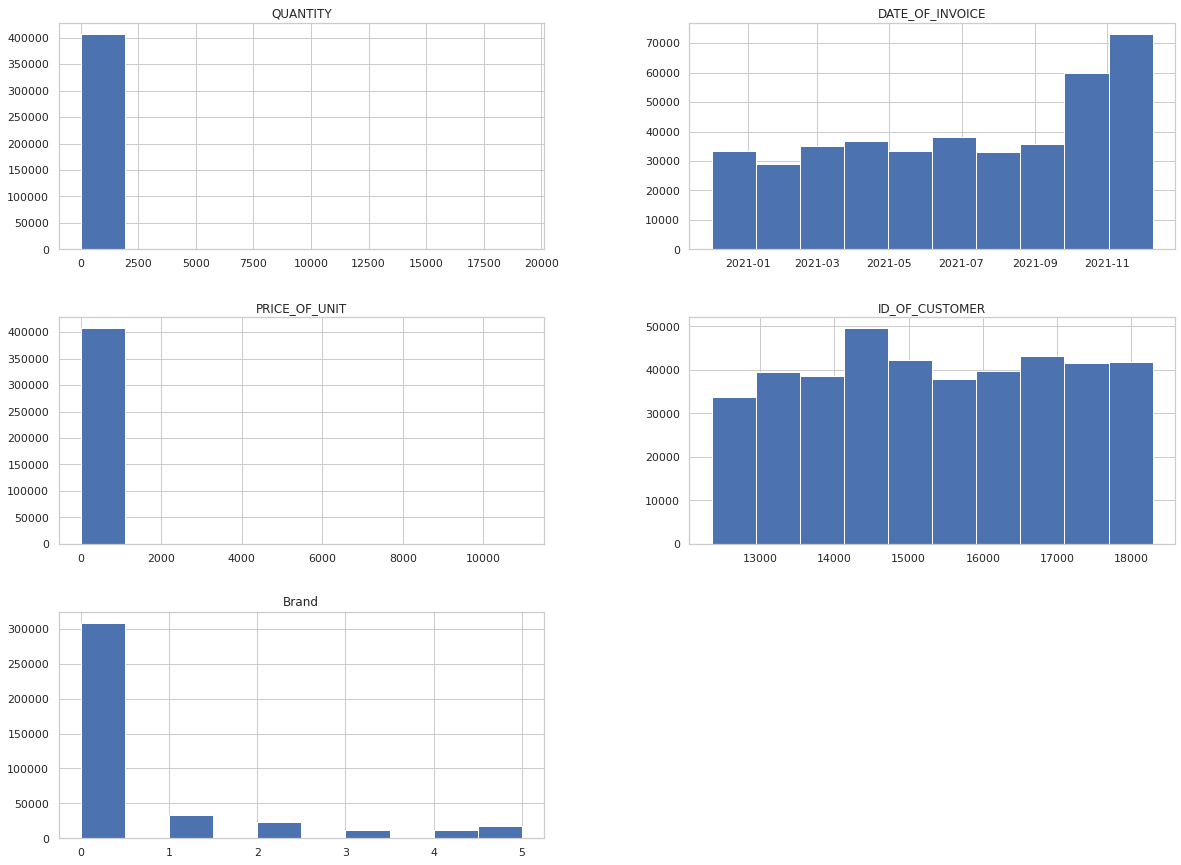

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
df3.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

**Exploring how much each country sold**

In [194]:
df3['Sales'] = df3['QUANTITY']*df3['PRICE_OF_UNIT']
df3['Sales']=df3['Sales'].astype('int64')

In [196]:
top_sales_country = pd.DataFrame(data={'Country':df3['Country'],'Sales':df3['Sales']})
top_sales_country = top_sales_country.groupby('Country').sum().reset_index()

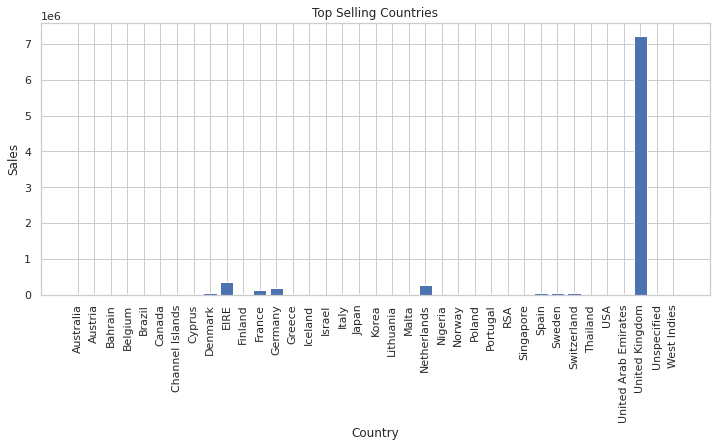

In [197]:
plt.figure(figsize=(12,5))
plt.bar(top_sales_country['Country'],top_sales_country['Sales'])
plt.title('Top Selling Countries')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical');

**Monthly sales analysis**

In [198]:
df3['DATE_OF_INVOICE'] = pd.to_datetime(df3['DATE_OF_INVOICE'])
df3

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Brand,Sales
0,489434,12.0,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2,83
1,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81
2,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2,81
3,489434,48.0,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4,100
4,489434,24.0,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2,30
...,...,...,...,...,...,...,...,...
525456,538171,2.0,2021-12-09 20:01:00,2.95,17530.0,United Kingdom,0,5
525457,538171,1.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,2,3
525458,538171,1.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,2,3
525459,538171,2.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,0,7


In [199]:
df3['Month'] = pd.DatetimeIndex(df3['DATE_OF_INVOICE']).month
df3

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Brand,Sales,Month
0,489434,12.0,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2,83,12
1,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81,12
2,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2,81,12
3,489434,48.0,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4,100,12
4,489434,24.0,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2,30,12
...,...,...,...,...,...,...,...,...,...
525456,538171,2.0,2021-12-09 20:01:00,2.95,17530.0,United Kingdom,0,5,12
525457,538171,1.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,2,3,12
525458,538171,1.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,2,3,12
525459,538171,2.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,0,7,12


In [200]:
monthly_data_df = df3.groupby('Month').sum().reset_index()
monthly_data_df

,Month,QUANTITY,PRICE_OF_UNIT,ID_OF_CUSTOMER,Brand,Sales
0,1,370921.0,84958.372,332282699.0,5378,546667
1,2,372761.0,74726.446,355123509.0,8067,494837
2,3,503466.0,125453.741,497350579.0,19048,683553
3,4,352025.0,87965.712,416578403.0,20944,581298
4,5,386297.0,91810.500,438489795.0,20363,585815
5,6,391674.0,101125.050,479807980.0,7693,623619
6,7,325655.0,90292.920,414740732.0,15936,578183
7,8,453581.0,82668.910,406967122.0,24150,591366
8,9,568612.0,116536.811,529930602.0,28535,815162
9,10,598523.0,161476.400,758302098.0,30634,1012598


In [201]:
monthly_data_df['Month'] =monthly_data_df['Month'].transform(lambda x: calendar.month_name[x])
monthly_data_df['Month']

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
Name: Month, dtype: object

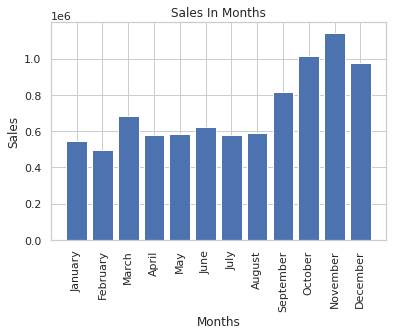

In [202]:
plt.bar(monthly_data_df['Month'],monthly_data_df['Sales'])
plt.xticks(range(0,12),rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales In Months')
plt.show()

**Monthly - Daily Sales Analysis**

In [203]:
day_data_df = df3.copy()
day_data_df['Day'] = pd.DatetimeIndex(day_data_df['DATE_OF_INVOICE']).day
day_data_df

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Brand,Sales,Month,Day
0,489434,12.0,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2,83,12,1
1,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81,12,1
2,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2,81,12,1
3,489434,48.0,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4,100,12,1
4,489434,24.0,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2,30,12,1
...,...,...,...,...,...,...,...,...,...,...
525456,538171,2.0,2021-12-09 20:01:00,2.95,17530.0,United Kingdom,0,5,12,9
525457,538171,1.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,2,3,12,9
525458,538171,1.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,2,3,12,9
525459,538171,2.0,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,0,7,12,9


In [204]:
day_data_df=day_data_df.groupby(['Month','Day']).sum().sort_values(['Month','Day']).reset_index()
day_data_df.drop(labels=['QUANTITY','PRICE_OF_UNIT','ID_OF_CUSTOMER'],axis=1,inplace=True)

In [205]:
day_data_arr = np.zeros((12,31))
for i in day_data_df.values:
    day_data_arr[i[0]-1][i[1]-1] = i[2]

In [206]:
ylabels = [calendar.month_name[i] for i in range(1,13)]

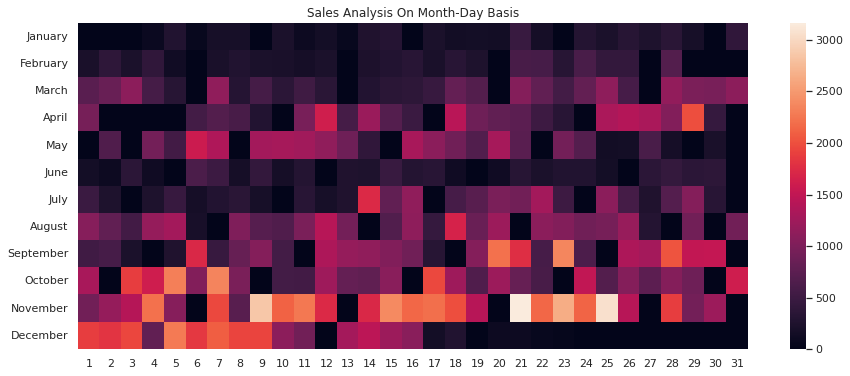

In [207]:
fig,ax = plt.subplots(figsize=(15,6))
plt.title('Sales Analysis On Month-Day Basis')
ax.set_xlabel('Days')
colormap = sns.color_palette("Greens")
sns.heatmap(day_data_arr,xticklabels=range(1,32),yticklabels=[calendar.month_name[i] for i in range(1,13)],label='Month',ax=ax);

**Hourly Sales Analysis**

In [208]:
hour_data_df = df3.copy()
hour_data_df['Hour'] = pd.DatetimeIndex(hour_data_df['DATE_OF_INVOICE']).hour

In [209]:
hour_data_df = hour_data_df.groupby('Hour').sum().reset_index().sort_values('Hour')

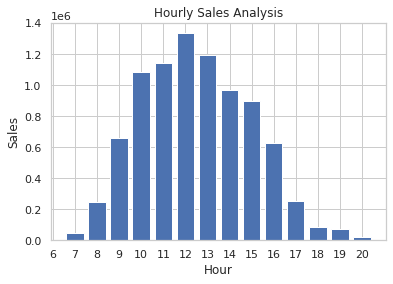

In [210]:
plt.bar(hour_data_df['Hour'],hour_data_df['Sales'])
plt.xticks(range(6,21))
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.title('Hourly Sales Analysis');

**Weekday Sales Analysis**

In [211]:
weekday_data_df = df3.copy()
weekday_data_df['Weekday'] = pd.DatetimeIndex(weekday_data_df['DATE_OF_INVOICE']).weekday

In [212]:
weekday_data_df = weekday_data_df.groupby('Weekday').sum().reset_index()

In [213]:
weekday_data_df['Weekday'] = weekday_data_df['Weekday'].transform(lambda x: calendar.day_name[x])

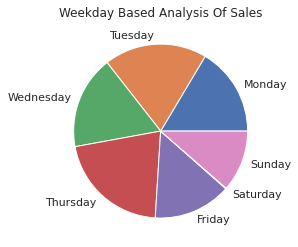

In [214]:
plt.pie(weekday_data_df['Sales'],labels=weekday_data_df['Weekday'])
plt.title('Weekday Based Analysis Of Sales');

**The top 5 countries in terms of sales**

In [215]:
top_sales_country = top_sales_country.sort_values(by='Sales',ascending=False).reset_index(drop=True)

In [216]:
top_sales_country['Country'].head()

0    United Kingdom
1              EIRE
2       Netherlands
3           Germany
4            France
Name: Country, dtype: object

**Top 3 months in terms of sales**

In [217]:
monthly_data_df = monthly_data_df.sort_values(by='Sales').reset_index(drop=True)
monthly_data_df['Month'].head(3)

0    February
1     January
2        July
Name: Month, dtype: object

**Best hours for sales or best time for advertising**

In [218]:
hour_data_df=hour_data_df.sort_values(by='Sales',ascending=False).reset_index(drop=True)

In [219]:
hour_data_df.head()

,Hour,QUANTITY,PRICE_OF_UNIT,ID_OF_CUSTOMER,Brand,Sales,Month
0,12,839520.0,227903.971,1.120064e+09,44893,1335131,540135
1,13,848252.0,206670.754,1.038057e+09,42428,1193582,507864
2,11,764379.0,181655.703,7.912324e+08,30634,1141813,373447
3,10,678317.0,126162.272,5.443456e+08,23090,1083211,260767
4,14,575066.0,176918.150,8.616095e+08,35410,972198,414085


**Best Weekdays in terms of sales**

In [220]:
weekday_data_df = weekday_data_df.sort_values(by='Sales',ascending=False).reset_index(drop=True)
weekday_data_df['Weekday'].head()

0     Thursday
1      Tuesday
2    Wednesday
3       Monday
4       Friday
Name: Weekday, dtype: object

In [221]:
# Calulate total purchase
df3['TOTAL_PURCHASE'] = df3['QUANTITY'] * df3['PRICE_OF_UNIT']
df3.head()

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Brand,Sales,Month,TOTAL_PURCHASE
0,489434,12.0,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2,83,12,83.4
1,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81,12,81.0
2,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2,81,12,81.0
3,489434,48.0,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4,100,12,100.8
4,489434,24.0,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2,30,12,30.0


In [222]:
# Converting Pandas Series to DateTime in a DataFrame
df3['DATE_OF_INVOICE']=pd.to_datetime(df3['DATE_OF_INVOICE'])
df3.head()

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Brand,Sales,Month,TOTAL_PURCHASE
0,489434,12.0,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2,83,12,83.4
1,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81,12,81.0
2,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2,81,12,81.0
3,489434,48.0,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4,100,12,100.8
4,489434,24.0,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2,30,12,30.0


In [223]:
# Extract month and year from InvoiceDate.
df3['MONTH_BY_YEAR'] = df3['DATE_OF_INVOICE'].apply(lambda x: x.strftime('%b-%Y'))
df3.head()

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Brand,Sales,Month,TOTAL_PURCHASE,MONTH_BY_YEAR
0,489434,12.0,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2,83,12,83.4,Dec-2020
1,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81,12,81.0,Dec-2020
2,489434,12.0,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2,81,12,81.0,Dec-2020
3,489434,48.0,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4,100,12,100.8,Dec-2020
4,489434,24.0,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2,30,12,30.0,Dec-2020


In [224]:
SALES=df3.pivot_table(index=['ID_OF_CUSTOMER'],columns=['MONTH_BY_YEAR'],values='TOTAL_PURCHASE',aggfunc='sum',fill_value=0).reset_index()
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2021,Aug-2021,Dec-2020,Dec-2021,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2021,Oct-2021,Sep-2021
0,12346.0,0.00,0.0,113.5,0.00,0.0,90.0,0.0,142.31,27.05,0.0,0.00,0.00,0.00
1,12347.0,0.00,0.0,0.0,711.79,0.0,0.0,0.0,0.00,0.00,0.0,0.00,611.53,0.00
2,12348.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,222.16
3,12349.0,1068.52,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,200.0,0.00,1402.62,0.00
4,12351.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,300.93,0.00,0.00


In [225]:
SALES['CLV']=SALES.iloc[:,2:].sum(axis=1)
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2021,Aug-2021,Dec-2020,Dec-2021,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2021,Oct-2021,Sep-2021,CLV
0,12346.0,0.00,0.0,113.5,0.00,0.0,90.0,0.0,142.31,27.05,0.0,0.00,0.00,0.00,372.86
1,12347.0,0.00,0.0,0.0,711.79,0.0,0.0,0.0,0.00,0.00,0.0,0.00,611.53,0.00,1323.32
2,12348.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,222.16,222.16
3,12349.0,1068.52,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,200.0,0.00,1402.62,0.00,1602.62
4,12351.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,300.93,0.00,0.00,300.93


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


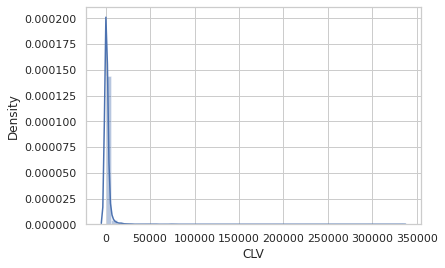

In [226]:
sns.distplot(SALES['CLV'],kde=True)

In [227]:
SALES['CLV'].describe()

count      4312.000000
mean       1910.341856
std        8460.247496
min           0.000000
25%         288.580000
50%         646.970000
75%        1607.342500
max      332567.800000
Name: CLV, dtype: float64

In [228]:
df4 = SALES[['ID_OF_CUSTOMER','Dec-2021','Nov-2021','Oct-2021','Sep-2021','Aug-2021','Jul-2021','CLV']]
df4.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Dec-2021,Nov-2021,Oct-2021,Sep-2021,Aug-2021,Jul-2021,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.0,0.0,372.86
1,12347.0,711.79,0.00,611.53,0.00,0.0,0.0,1323.32
2,12348.0,0.00,0.00,0.00,222.16,0.0,0.0,222.16
3,12349.0,0.00,0.00,1402.62,0.00,0.0,0.0,1602.62
4,12351.0,0.00,300.93,0.00,0.00,0.0,0.0,300.93


In [229]:
df5 = pd.DataFrame({'ID_OF_CUSTOMER': SALES['ID_OF_CUSTOMER'],
                    'Dec-2021': SALES['Dec-2021'],
                    'Nov-2021': SALES['Nov-2021'],
                    'Oct-2021': SALES['Oct-2021'],
                    'Sep-2021': SALES['Sep-2021'],
                    'Aug-2021': SALES['Aug-2021'],
                    'Jul-2021': SALES['Jul-2021'],
                    'CLV': SALES['CLV']})
df5.head()

,ID_OF_CUSTOMER,Dec-2021,Nov-2021,Oct-2021,Sep-2021,Aug-2021,Jul-2021,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.0,0.0,372.86
1,12347.0,711.79,0.00,611.53,0.00,0.0,0.0,1323.32
2,12348.0,0.00,0.00,0.00,222.16,0.0,0.0,222.16
3,12349.0,0.00,0.00,1402.62,0.00,0.0,0.0,1602.62
4,12351.0,0.00,300.93,0.00,0.00,0.0,0.0,300.93


In [230]:
# find out correlation between params
df5.corr()

,ID_OF_CUSTOMER,Dec-2021,Nov-2021,Oct-2021,Sep-2021,Aug-2021,Jul-2021,CLV
ID_OF_CUSTOMER,1.000000,0.016142,-0.021567,-0.024499,-0.010119,0.010931,0.001854,-0.009471
Dec-2021,0.016142,1.000000,0.434112,0.541854,0.173815,0.682136,0.786890,0.673058
Nov-2021,-0.021567,0.434112,1.000000,0.695332,0.508283,0.624435,0.466092,0.768984
Oct-2021,-0.024499,0.541854,0.695332,1.000000,0.507198,0.689905,0.628245,0.831425
Sep-2021,-0.010119,0.173815,0.508283,0.507198,1.000000,0.365958,0.233303,0.610987
Aug-2021,0.010931,0.682136,0.624435,0.689905,0.365958,1.000000,0.813506,0.871260
Jul-2021,0.001854,0.786890,0.466092,0.628245,0.233303,0.813506,1.000000,0.798505
CLV,-0.009471,0.673058,0.768984,0.831425,0.610987,0.871260,0.798505,1.000000


In [231]:
corr_matrix = df5.corr()
corr_matrix["CLV"].sort_values(ascending=False)

CLV               1.000000
Aug-2021          0.871260
Oct-2021          0.831425
Jul-2021          0.798505
Nov-2021          0.768984
Dec-2021          0.673058
Sep-2021          0.610987
ID_OF_CUSTOMER   -0.009471
Name: CLV, dtype: float64

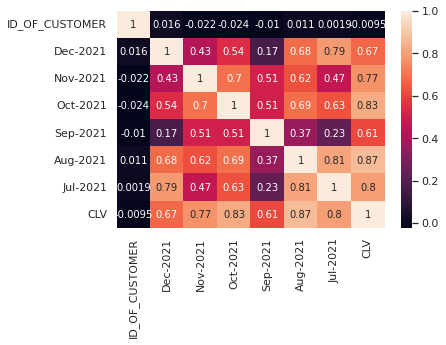

In [232]:
sns.heatmap(df5.corr(),annot=True)

**Modeling**

In [233]:
df5.columns

Index(['ID_OF_CUSTOMER', 'Dec-2021', 'Nov-2021', 'Oct-2021', 'Sep-2021',
       'Aug-2021', 'Jul-2021', 'CLV'],
      dtype='object')

In [234]:
X = df5[ ['Dec-2021', 'Nov-2021', 'Oct-2021', 'Sep-2021','Aug-2021','Jul-2021'] ]
y = df5[ ['CLV']]

In [235]:
clv_features = [X for i,X in enumerate(X.columns) if i!=6]

In [236]:
import statsmodels.api as st
X1 = st.add_constant(X)
reg_model=st.OLS(y,X1)
result=reg_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.944     
Dependent Variable: CLV              AIC:                77812.0648
Date:               2022-03-30 08:42 BIC:                77856.6489
No. Observations:   4312             Log-Likelihood:     -38899.   
Df Model:           6                F-statistic:        1.209e+04 
Df Residuals:       4305             Prob (F-statistic): 0.00      
R-squared:          0.944            Scale:              4.0167e+06
--------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const         46.2424   31.6665   1.4603  0.1443  -15.8402  108.3249
Dec-2021       0.5445    0.0929   5.8615  0.0000    0.3624    0.7267
Nov-2021       1.5308    0.0427  35.8540  0.0000    1.4470    1.6145
Oct-2021       1.5404    0.0511  30.1354  0.0000    1.4401  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [238]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [239]:
X_train1 = st.add_constant(X_train)
reg_model=st.OLS(y_train,X_train1)
result=reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     8922.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:42:34   Log-Likelihood:                -26253.
No. Observations:                2889   AIC:                         5.252e+04
Df Residuals:                    2882   BIC:                         5.256e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4229     41.396      1.725      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [240]:
print("Precision of linear regression on training set: {:.3f}".format(regressor.score(X_train, y_train)))
print("Precision of linear regression on test set: {:.3f}".format(regressor.score(X_test, y_test)))

Precision of linear regression on training set: 0.949
Precision of linear regression on test set: 0.909


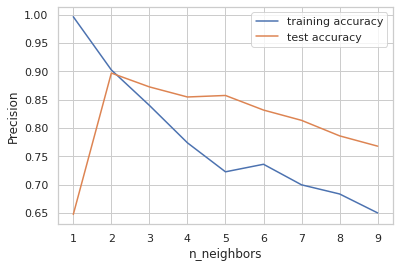

In [241]:
from sklearn.neighbors import KNeighborsRegressor
training_precision = []
test_precision = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set precision
    training_precision.append(knn.score(X_train, y_train))
    # record test set precision
    test_precision.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_precision, label="training accuracy")
plt.plot(neighbors_settings, test_precision, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [242]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print("Precision of K-NN regressor on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Precision of K-NN regressor on test set: {:.3f}".format(knn.score(X_test, y_test)))

Precision of K-NN regressor on training set: 0.723
Precision of K-NN regressor on test set: 0.857


In [243]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [244]:
print("Precision of support vector regressor on training set: {:.2f}".format(svr.score(X_train, y_train)))
print("Precision of support vector regressor on test set: {:.2f}".format(svr.score(X_test, y_test)))

Precision of support vector regressor on training set: -0.01
Precision of support vector regressor on test set: -0.03


In [245]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [246]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.00195126 0.03969279 0.11904874 0.02194988 0.76244895 0.05490838]


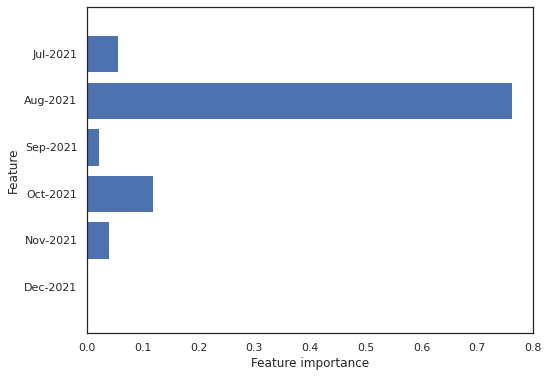

In [247]:
sns.set(style="white")

def plot_feature_importances_clv(model):
    plt.figure(figsize=(8,6))
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), clv_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_clv(dt)

In [248]:
print("Precision of decision tree regressor on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Precision of decision tree regressor on test set: {:.3f}".format(dt.score(X_test, y_test)))

Precision of decision tree regressor on training set: 0.997
Precision of decision tree regressor on test set: 0.636


In [249]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=42)

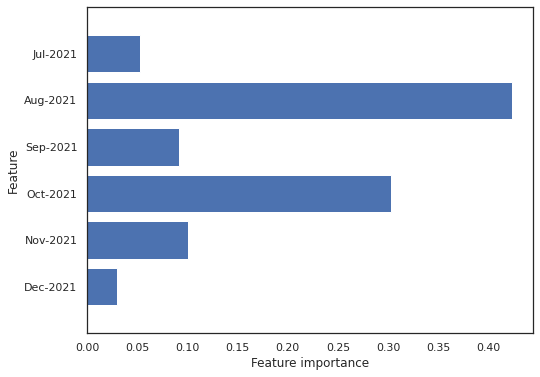

In [250]:
plot_feature_importances_clv(rf)

In [251]:
print("Precision of random forest regressor on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Precision of random forest regressor on test set: {:.3f}".format(rf.score(X_test, y_test)))

Precision of random forest regressor on training set: 0.955
Precision of random forest regressor on test set: 0.827


In [252]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

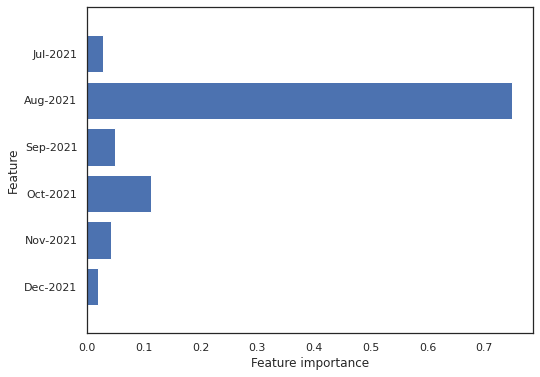

In [253]:
plot_feature_importances_clv(gb)

In [254]:
print("Precision of gradient boosting regressor on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Precision of gradient boosting regressor test set: {:.3f}".format(gb.score(X_test, y_test)))

Precision of gradient boosting regressor on training set: 0.991
Precision of gradient boosting regressor test set: 0.851


**Evaluation**

In [255]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [256]:
y_pred_regressor = regressor.predict(X_test)

In [257]:
regressor_r = regressor.score(X_test, y_test)
print("Linear Regression R squared:","{:.2%}".format(regressor_r))

Linear Regression R squared: 90.88%


In [258]:
regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)
print('Linear Regression RMSE: %.4f' % regressor_rmse)

Linear Regression RMSE: 1784.9929


In [259]:
y_pred_knn = knn.predict(X_test)

In [260]:
knn_r = knn.score(X_test, y_test)
print("K-Nearest Neighbors R squared:","{:.2%}".format(knn_r))

K-Nearest Neighbors R squared: 85.74%


In [261]:
knn_mse = mean_squared_error(y_pred_knn, y_test)
knn_rmse = np.sqrt(knn_mse)
print('K-Nearest Neighbors RMSE: %.4f' % knn_rmse)

K-Nearest Neighbors RMSE: 2232.4206


In [262]:
y_pred_svr = svr.predict(X_test)

In [263]:
svr_r = svr.score(X_test, y_test)
print("Support Vector Machine R squared:","{:.2%}".format(svr_r))

Support Vector Machine R squared: -2.65%


In [264]:
svr_mse = mean_squared_error(y_pred_svr, y_test)
svr_rmse = np.sqrt(svr_mse)
print('Support Vector Machine RMSE: %.4f' % svr_rmse)

Support Vector Machine RMSE: 5990.0573


In [265]:
y_pred_dt = dt.predict(X_test)

In [266]:
dt_r = dt.score(X_test, y_test)
print("Decision Tree R squared:","{:.2%}".format(dt_r))

Decision Tree R squared: 63.63%


In [267]:
dt_mse = mean_squared_error(y_pred_dt, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree RMSE: %.4f' % dt_rmse)

Decision Tree RMSE: 3565.3738


In [268]:
y_pred_rf = rf.predict(X_test)

In [269]:
rf_r = rf.score(X_test, y_test)
print("Random Forest R squared:","{:.2%}".format(rf_r))

Random Forest R squared: 82.67%


In [270]:
rf_mse = mean_squared_error(y_pred_rf, y_test)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest RMSE: %.4f' % rf_rmse)

Random Forest RMSE: 2461.1337


In [271]:
y_pred_gb = gb.predict(X_test)

In [272]:
gb_r = gb.score(X_test, y_test)
print("Gradient Boosting R squared:","{:.2%}".format(gb_r))

Gradient Boosting R squared: 85.11%


In [273]:
gb_mse = mean_squared_error(y_pred_gb, y_test)
gb_rmse = np.sqrt(gb_mse)
print('Gradient Boosting RMSE: %.4f' % gb_rmse)

Gradient Boosting RMSE: 2281.6884


In [274]:
models = ['Linear Regression','K-Nearest Neighbors', 
          'Support Vector Machine', 'Decision Tree',
          'Random Forest', 'Gradient Boosting']
tests_rmse = [regressor_rmse, knn_rmse, svr_rmse, dt_rmse, rf_rmse, gb_rmse]
tests_r = [regressor_r, knn_r, svr_r, dt_r, rf_r, gb_r]

In [275]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests RMSE": tests_rmse })
compare_models.sort_values(by = "Tests RMSE", ascending = True)

,Algorithms,Tests RMSE
0,Linear Regression,1784.992859
1,K-Nearest Neighbors,2232.420629
5,Gradient Boosting,2281.688433
4,Random Forest,2461.133707
3,Decision Tree,3565.373784
2,Support Vector Machine,5990.057259


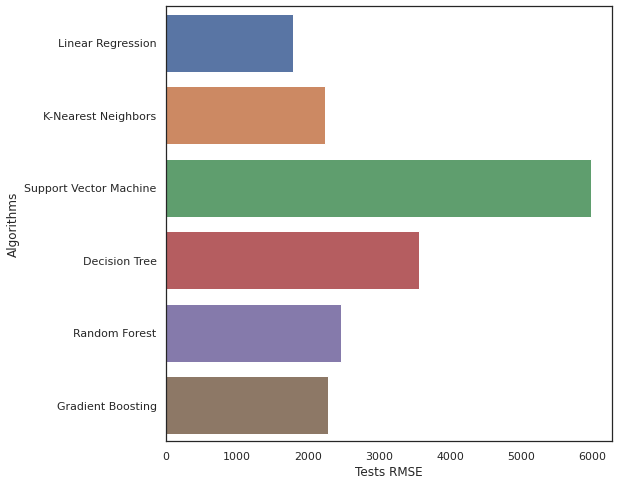

In [276]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests RMSE", y = "Algorithms", data = compare_models)
plt.show()

In [277]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests R Squared": tests_r  })
compare_models.sort_values(by = "Tests R Squared", ascending = False)

,Algorithms,Tests R Squared
0,Linear Regression,0.908849
1,K-Nearest Neighbors,0.857426
5,Gradient Boosting,0.851064
4,Random Forest,0.826716
3,Decision Tree,0.636338
2,Support Vector Machine,-0.026477


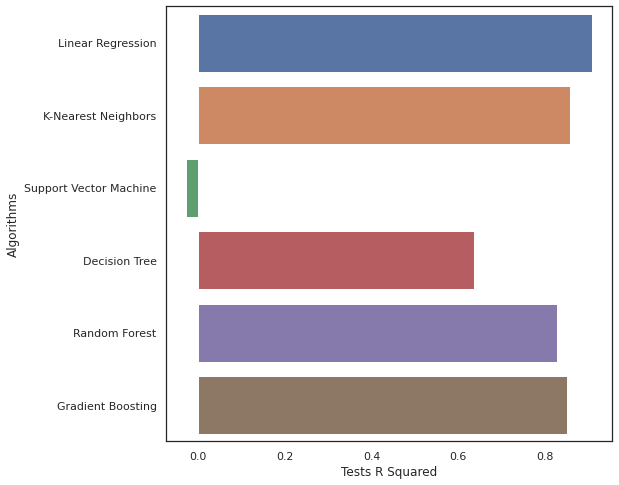

In [278]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests R Squared", y = "Algorithms", data = compare_models)
plt.show()

**Deployment**

In [279]:
a = float(input("Please enter the revenue from a customer one month ago:"))
b = float(input("Please enter the revenue from a customer two months ago:"))
c = float(input("Please enter the revenue from a customer three months ago :"))
d = float(input("Please enter the revenue from a customer four months ago:"))
e = float(input("Please enter the revenue from a customer five months ago :"))
f = float(input("Please enter the revenue from a customer six months ago:"))
new_data = np.array([a,b,c,d,e,f]).reshape(1,-1)
new_pred=regressor.predict(new_data)
new_pred1 = int(new_pred[0][0])

print("\033[1m The customer CLV is:", '${:,.0f}'.format(new_pred1))

Please enter the revenue from a customer one month ago:23145
Please enter the revenue from a customer two months ago:77869
Please enter the revenue from a customer three months ago :3540
Please enter the revenue from a customer four months ago:86789
Please enter the revenue from a customer five months ago :13450
Please enter the revenue from a customer six months ago:65890
 The customer CLV is: $457,052


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [280]:
ExpectedValue = new_pred1
ExpectedValue

457052

In [281]:
StandardError = int(regressor_rmse)
StandardError 

1784

In [282]:
import scipy.stats as si
def normsinv(x):
    x = si.norm.ppf(x)
    return (x)

In [283]:
alpha = 1 - 0.99
Z = round(abs(normsinv(0.5*alpha)),3)
Z

2.576

In [284]:
Upper = int(ExpectedValue + Z * StandardError)
Upper

461647

In [285]:
Lower = int(ExpectedValue - Z * StandardError)
Lower

452456

In [286]:
print("\033[1m With a confidence level of 99%, the CLV of the Customer is between " '${:,.0f}'.format(Lower),"and",'${:,.0f}.'.format(Upper),"The average value the CLV is " '${:,.0f}.'.format(ExpectedValue))

 With a confidence level of 99%, the CLV of the Customer is between $452,456 and $461,647. The average value the CLV is $457,052.
